Text(0, 0.5, 'Pulser voltage (kV)')

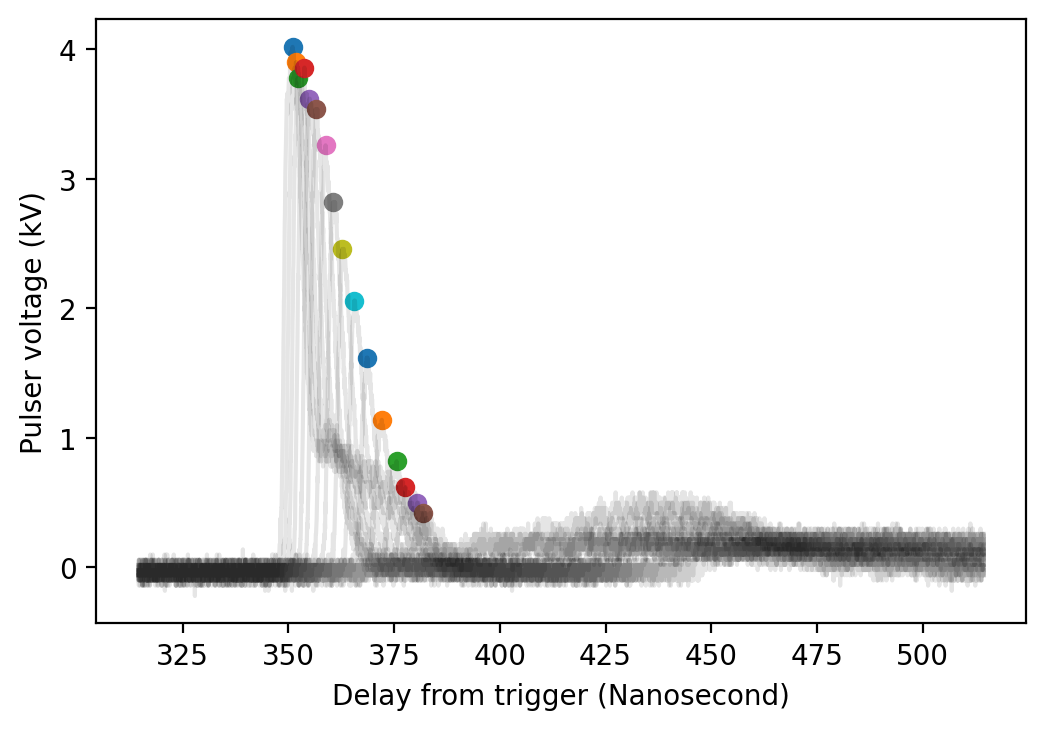

In [2]:
# Plot all the pulses, the just the short and long at 2.48 kV.

import numpy
import os
import helper
import h5py
from matplotlib import pyplot

# file_comment = list of [filename string, comment string]

file_comment = helper.get_file_comment('./longcable/')

figure, axis = pyplot.subplots(dpi = 200)
file_to_delay = {}

for [f, input_kV] in file_comment:
    h5file = h5py.File(f, 'r')
    x = h5file['pulserscope_traces_x'][0]
    y = h5file['pulserscope_traces_y'][0]
    # Assume there is one max, and it's the one we're looking for.
    # The last dot is too far to the right. Max around only the peak.
    y_max_index = numpy.argmax(y[0:2000])
    file_to_delay[f] = x[y_max_index]
    axis.plot(x[y_max_index], y[y_max_index], 'o')
        
for [f, input_kV] in file_comment:
    h5file = h5py.File(f)
    x = h5file['pulserscope_traces_x'][0]
    y = h5file['pulserscope_traces_y'][0]
    axis.plot(x, y, 'k', alpha = 0.10)

axis.set_xlabel('Delay from trigger (Nanosecond)')
axis.set_ylabel('Pulser voltage (kV)')

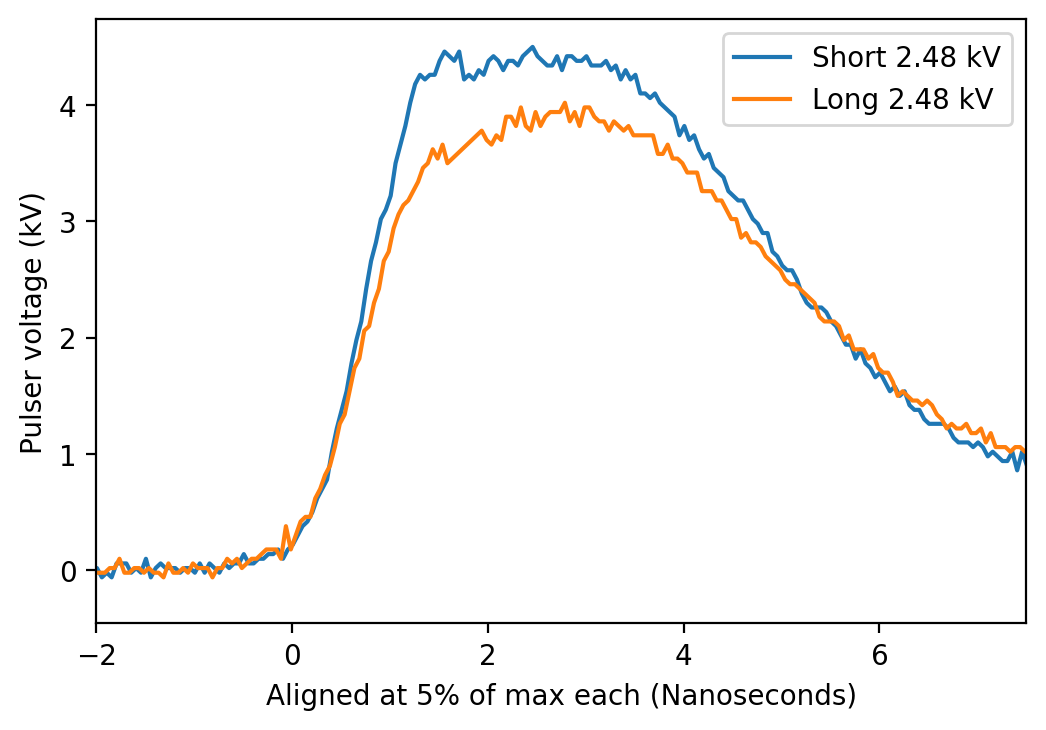

In [3]:
# Compare the peaks of the short and long cable at 2.48 kV input.

figure, axis = pyplot.subplots(dpi = 200)

short_cable_max = h5py.File('./shortcable/2021-11-24-13-17-48')
long_cable_max = h5py.File('./longcable/2021-11-24-13-44-03')

short_x = short_cable_max['pulserscope_traces_x'][0]
short_y = short_cable_max['pulserscope_traces_y'][0]

long_x = long_cable_max['pulserscope_traces_x'][0]
long_y = long_cable_max['pulserscope_traces_y'][0]

short_x -= 239.88
long_x -= 348.2

axis.plot(short_x, short_y)
axis.plot(long_x, long_y)
axis.set_xlim(-2, 7.5)
axis.set_xlabel('Aligned at 5% of max each (Nanoseconds)')
axis.set_ylabel('Pulser voltage (kV)')
axis.legend(['Short 2.48 kV', 'Long 2.48 kV'])